## Basic Analysis of Crashes involving Bicycles in Boulder, CO

In [40]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import re
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

### Basic data preparation



In [41]:
# read in file
df = pd.read_csv("data/Crash_data.csv")

In [42]:
df

,OID,PrmaryCollsionType,CaseNumber,UnitsInvolved,CrossStreet,StreetType,DirectionFromIntersection,FeetFromIntersection,CollisionDate,ReportedDate,...,Lon,DUI,AlcoholDrugSuspected,BicyclesInvolved,PedestriansInvolved,RoadDescription,Crash_Time,ESRI_OID,x,y
0,4931,COLLISION W/ MV - FRONT TO REAR,1904154,2,S. BOULDER RD/MANHATTAN CIR.,CITY ST/CNTY RD,W,NaN,4/18/2019 6:00:00 AM,4/18/2019 6:00:00 AM,...,-105.227477,NO,NO,NO,NO,INTERSECTION RELATED,1228,106,-105.227477,39.985895
1,10847,COLLISION W/ MV - FRONT TO REAR,2206289,2,26TH ST/CANYON BLVD,CITY ST/CNTY RD,N,100,7/3/2022 6:00:00 AM,7/3/2022 6:00:00 AM,...,-105.260463,NO,NO,NO,NO,NON-INTERSECTION,1830,107,-105.260463,40.017486
2,11727,COLLISION W/ MV - FRONT TO REAR,2212629,2,ARAPAHOE AVE,OTHER RDWY,,NaN,12/25/2022 7:00:00 AM,12/25/2022 7:00:00 AM,...,-105.263361,NO,NO,NO,NO,NaN,1614,108,-105.263361,40.014816
3,12855,COLLISION W/ MV - FRONT TO SIDE,2307980,2,MOORHEAD AVENUE,NaN,,NaN,8/15/2023 6:00:00 AM,8/17/2023 6:00:00 AM,...,-105.259824,NO,NO,NO,NO,PARKING LOT,2045,109,-105.259824,39.998445
4,12888,COLLISION W/ MV - FRONT TO SIDE,2308220,2,28TH STREET/MAPLETON AVE,STATE HWY,,NaN,8/23/2023 6:00:00 AM,8/23/2023 6:00:00 AM,...,-105.258383,NO,NO,NO,NO,AT INTERSECTION,1330,110,-105.258383,40.025511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13292,8597,COLLISION W/ OBJECT,1,3,,,,,4/12/2021 6:00:00 AM,4/12/2021 6:00:00 AM,...,NaN,NO,NO,NO,NO,EXPRESS/MANAGED/HOV LANE,0900,13447,NaN,NaN
13293,10080,COLLISION W/ OTHER VEH - PARKED MV,2200754,2,CASCADE AVE/20TH ST,CITY ST/CNTY RD,W,96,1/25/2022 7:00:00 AM,1/25/2022 7:00:00 AM,...,-105.267770,NO,NO,NO,NO,ALLEY RELATED,0744,13448,-105.267770,40.001851
13294,12011,COLLISION W/ MV - FRONT TO REAR,2301807,2,CANYON BLVD/28TH ST,STATE HWY,,NaN,2/23/2023 7:00:00 AM,2/23/2023 7:00:00 AM,...,-105.258456,NO,NO,NO,NO,AT INTERSECTION,2050,13449,-105.258456,40.017347
13295,11984,COLLISION W/ MV - FRONT TO SIDE,2301556,2,TABLE MESA DRIVE/S LOOP DRIVE,CITY ST/CNTY RD,,NaN,2/15/2023 7:00:00 AM,2/17/2023 7:00:00 AM,...,-105.234551,NO,NO,NO,NO,AT INTERSECTION,2225,13450,-105.235069,39.986390


In [43]:
# preview info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13297 entries, 0 to 13296
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OID                        13297 non-null  int64  
 1   PrmaryCollsionType         13297 non-null  object 
 2   CaseNumber                 13297 non-null  int64  
 3   UnitsInvolved              13297 non-null  int64  
 4   CrossStreet                13290 non-null  object 
 5   StreetType                 11526 non-null  object 
 6   DirectionFromIntersection  13297 non-null  object 
 7   FeetFromIntersection       2628 non-null   object 
 8   CollisionDate              13297 non-null  object 
 9   ReportedDate               13296 non-null  object 
 10  ReportedYear               13296 non-null  float64
 11  ReportedMonth              13296 non-null  float64
 12  ReportedMonthName          13296 non-null  object 
 13  ReportedWeek               13296 non-null  flo

In [44]:
df.describe()

,OID,CaseNumber,UnitsInvolved,ReportedYear,ReportedMonth,ReportedWeek,ReportedDayofWeekNum,ReportedDayofMonth,ReportedHour,NumKilled,NumSeriouslyInjured,NumInjuredOrKilled,Lat,Lon,ESRI_OID,x,y
count,13297.000000,1.329700e+04,13297.000000,13296.000000,13296.00000,13296.000000,13296.000000,13296.000000,13296.000000,13297.000000,13297.000000,13297.000000,12026.000000,12026.000000,13297.000000,12026.000000,12026.000000
mean,6775.936527,1.995658e+06,2.000451,2019.881242,6.87500,13.096495,4.174789,15.601233,13.096495,0.001579,0.027224,0.116643,40.015781,-105.257787,6782.565391,-105.257788,40.015782
std,3867.639926,1.947099e+05,0.592649,1.928615,3.39564,5.050458,1.811704,8.787234,5.050458,0.043333,0.168197,0.357582,0.017732,0.018141,3845.066097,0.018140,0.017731
min,1.000000,1.000000e+00,1.000000,2017.000000,1.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.964537,-105.297895,106.000000,-105.297895,39.964537
25%,3439.000000,1.812492e+06,2.000000,2018.000000,4.00000,10.000000,3.000000,8.000000,10.000000,0.000000,0.000000,0.000000,40.005172,-105.272693,3457.000000,-105.272693,40.005172
50%,6792.000000,2.000175e+06,2.000000,2020.000000,7.00000,13.000000,4.000000,16.000000,13.000000,0.000000,0.000000,0.000000,40.014866,-105.258401,6781.000000,-105.258401,40.014866
75%,10124.000000,2.200915e+06,2.000000,2022.000000,10.00000,16.000000,6.000000,23.000000,16.000000,0.000000,0.000000,0.000000,40.023419,-105.248252,10105.000000,-105.248252,40.023419
max,13451.000000,2.373985e+06,44.000000,2023.000000,12.00000,23.000000,7.000000,31.000000,23.000000,2.000000,3.000000,4.000000,40.094401,-105.178496,13451.000000,-105.178496,40.094401


In [45]:
# null values
df.isnull().sum()

OID                              0
PrmaryCollsionType               0
CaseNumber                       0
UnitsInvolved                    0
CrossStreet                      7
StreetType                    1771
DirectionFromIntersection        0
FeetFromIntersection         10669
CollisionDate                    0
ReportedDate                     1
ReportedYear                     1
ReportedMonth                    1
ReportedMonthName                1
ReportedWeek                     1
ReportedDayofWeekNum             1
ReportedDayofMonth               1
ReportedDayofWeek                1
ReportedHour                     1
HitAndRunStatus                  0
LightingCondition              172
RoadCondition                  617
WeatherCondition                40
Severity                         0
NumKilled                        0
NumSeriouslyInjured              0
NumInjuredOrKilled               0
Lat                           1271
Lon                           1271
DUI                 

In [46]:
# drop irrelevant columns
df.drop(["StreetType", "DirectionFromIntersection", "FeetFromIntersection", 
         "x", "y", "ESRI_OID", "UnitsInvolved", "ReportedDate"], axis=1, inplace=True)
df

,OID,PrmaryCollsionType,CaseNumber,CrossStreet,CollisionDate,ReportedYear,ReportedMonth,ReportedMonthName,ReportedWeek,ReportedDayofWeekNum,...,NumSeriouslyInjured,NumInjuredOrKilled,Lat,Lon,DUI,AlcoholDrugSuspected,BicyclesInvolved,PedestriansInvolved,RoadDescription,Crash_Time
0,4931,COLLISION W/ MV - FRONT TO REAR,1904154,S. BOULDER RD/MANHATTAN CIR.,4/18/2019 6:00:00 AM,2019.0,4.0,April,15.0,5.0,...,0,0,39.985895,-105.227477,NO,NO,NO,NO,INTERSECTION RELATED,1228
1,10847,COLLISION W/ MV - FRONT TO REAR,2206289,26TH ST/CANYON BLVD,7/3/2022 6:00:00 AM,2022.0,7.0,July,20.0,1.0,...,0,0,40.017486,-105.260463,NO,NO,NO,NO,NON-INTERSECTION,1830
2,11727,COLLISION W/ MV - FRONT TO REAR,2212629,ARAPAHOE AVE,12/25/2022 7:00:00 AM,2022.0,12.0,December,17.0,1.0,...,0,0,40.014816,-105.263361,NO,NO,NO,NO,NaN,1614
3,12855,COLLISION W/ MV - FRONT TO SIDE,2307980,MOORHEAD AVENUE,8/15/2023 6:00:00 AM,2023.0,8.0,August,14.0,5.0,...,0,0,39.998445,-105.259824,NO,NO,NO,NO,PARKING LOT,2045
4,12888,COLLISION W/ MV - FRONT TO SIDE,2308220,28TH STREET/MAPLETON AVE,8/23/2023 6:00:00 AM,2023.0,8.0,August,8.0,4.0,...,0,0,40.025511,-105.258383,NO,NO,NO,NO,AT INTERSECTION,1330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13292,8597,COLLISION W/ OBJECT,1,,4/12/2021 6:00:00 AM,2021.0,4.0,April,0.0,2.0,...,0,0,NaN,NaN,NO,NO,NO,NO,EXPRESS/MANAGED/HOV LANE,0900
13293,10080,COLLISION W/ OTHER VEH - PARKED MV,2200754,CASCADE AVE/20TH ST,1/25/2022 7:00:00 AM,2022.0,1.0,January,16.0,3.0,...,0,0,40.001851,-105.267770,NO,NO,NO,NO,ALLEY RELATED,0744
13294,12011,COLLISION W/ MV - FRONT TO REAR,2301807,CANYON BLVD/28TH ST,2/23/2023 7:00:00 AM,2023.0,2.0,February,23.0,5.0,...,0,0,40.017347,-105.258456,NO,NO,NO,NO,AT INTERSECTION,2050
13295,11984,COLLISION W/ MV - FRONT TO SIDE,2301556,TABLE MESA DRIVE/S LOOP DRIVE,2/15/2023 7:00:00 AM,2023.0,2.0,February,0.0,6.0,...,0,0,39.986458,-105.234551,NO,NO,NO,NO,AT INTERSECTION,2225


In [47]:
# count of bikes involved
df['BicyclesInvolved'].value_counts()

NO     12588
YES      709
Name: BicyclesInvolved, dtype: int64

### Make a dataframe containing crashes involving bicycles

In [48]:
bicycles = df[df['BicyclesInvolved'] == "YES"]
bicycles

,OID,PrmaryCollsionType,CaseNumber,CrossStreet,CollisionDate,ReportedYear,ReportedMonth,ReportedMonthName,ReportedWeek,ReportedDayofWeekNum,...,NumSeriouslyInjured,NumInjuredOrKilled,Lat,Lon,DUI,AlcoholDrugSuspected,BicyclesInvolved,PedestriansInvolved,RoadDescription,Crash_Time
5,11080,COLLISION W/ MV - FRONT TO SIDE,2208096,28TH FRONTAGE RD/AURORA AVE,8/20/2022 6:00:00 AM,2022.0,8.0,August,17.0,1.0,...,0,1,40.004893,-105.258579,NO,NO,YES,NO,DRIVEWAY ACCESS RELATED,1615
36,12301,COLLISION W/ OTHER VEH - BICYCLE,2304143,PLEASANT ST./11TH ST.,5/3/2023 6:00:00 AM,2023.0,5.0,May,21.0,4.0,...,0,0,40.009451,-105.278667,NO,NO,YES,NO,NaN,2155
56,5694,COLLISION W/ OBJECT,1908872,PEARL PKWY/49TH ST,8/7/2019 6:00:00 AM,2019.0,8.0,August,19.0,5.0,...,1,1,40.021976,-105.238467,NO,NO,YES,NO,NON-INTERSECTION,2128
332,188,COLLISION W/ OBJECT,1710316,FOOTHILLS PKWY/VALMONT RD,8/14/2017 6:00:00 AM,2017.0,8.0,August,12.0,2.0,...,0,1,NaN,NaN,NO,NO,YES,NO,NON-INTERSECTION,1000
355,7014,COLLISION W/ OBJECT,2001687,FOOTHILLS PKWY/TABLE MESA,2/14/2020 7:00:00 AM,2020.0,2.0,February,15.0,6.0,...,0,0,40.017687,-105.250702,NO,NO,YES,NO,NON-INTERSECTION,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13072,11533,COLLISION W/ OTHER VEH - BICYCLE,2211377,BASELINE RD/CANYON CREEK,11/14/2022 7:00:00 AM,2022.0,11.0,November,20.0,2.0,...,0,1,39.999949,-105.254450,NO,NO,YES,NO,AT INTERSECTION,1522
13073,9859,COLLISION W/ OTHER VEH - BICYCLE,2111686,ALPINE AVE/6TH ST,12/7/2021 7:00:00 AM,2021.0,12.0,December,14.0,3.0,...,0,1,40.025520,-105.288730,NO,NO,YES,NO,AT INTERSECTION,1534
13074,9501,COLLISION W/ OTHER VEH - BICYCLE,2109296,13TH STREET/HIGH SREET,9/30/2021 6:00:00 AM,2021.0,9.0,September,9.0,5.0,...,0,0,40.022453,-105.280127,NO,NO,YES,NO,AT INTERSECTION,0843
13077,8984,COLLISION W/ OTHER VEH - BICYCLE,2105628,30TH STREET/ARAPAHOE AVENUE,7/1/2021 6:00:00 AM,2021.0,7.0,July,7.0,5.0,...,1,1,40.014563,-105.253686,NO,NO,YES,NO,AT INTERSECTION,1522


In [49]:
bicycles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 5 to 13296
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OID                   709 non-null    int64  
 1   PrmaryCollsionType    709 non-null    object 
 2   CaseNumber            709 non-null    int64  
 3   CrossStreet           709 non-null    object 
 4   CollisionDate         709 non-null    object 
 5   ReportedYear          709 non-null    float64
 6   ReportedMonth         709 non-null    float64
 7   ReportedMonthName     709 non-null    object 
 8   ReportedWeek          709 non-null    float64
 9   ReportedDayofWeekNum  709 non-null    float64
 10  ReportedDayofMonth    709 non-null    float64
 11  ReportedDayofWeek     709 non-null    object 
 12  ReportedHour          709 non-null    float64
 13  HitAndRunStatus       709 non-null    object 
 14  LightingCondition     705 non-null    object 
 15  RoadCondition        

## Analysis

In [50]:
bicycles.corr()

,OID,CaseNumber,ReportedYear,ReportedMonth,ReportedWeek,ReportedDayofWeekNum,ReportedDayofMonth,ReportedHour,NumKilled,NumSeriouslyInjured,NumInjuredOrKilled,Lat,Lon
OID,1.000000,0.911989,0.986983,-0.056689,0.082082,-0.002400,-0.015566,0.082082,0.017565,0.061591,0.112622,-0.017808,0.032566
CaseNumber,0.911989,1.000000,0.917948,-0.110122,0.121139,0.001508,-0.038239,0.121139,-0.175586,0.063185,0.106001,-0.003377,0.047098
ReportedYear,0.986983,0.917948,1.000000,-0.165152,0.085162,-0.007206,-0.020609,0.085162,0.024386,0.060773,0.126328,-0.001705,0.048393
ReportedMonth,-0.056689,-0.110122,-0.165152,1.000000,-0.061632,-0.026844,-0.040540,-0.061632,-0.065628,0.001972,-0.073437,-0.047743,-0.057629
ReportedWeek,0.082082,0.121139,0.085162,-0.061632,1.000000,0.032678,-0.087563,1.000000,-0.069382,-0.038954,0.038954,-0.002687,0.016346
ReportedDayofWeekNum,-0.002400,0.001508,-0.007206,-0.026844,0.032678,1.000000,-0.031672,0.032678,-0.006658,-0.027204,-0.051945,-0.061023,-0.042102
ReportedDayofMonth,-0.015566,-0.038239,-0.020609,-0.040540,-0.087563,-0.031672,1.000000,-0.087563,0.045855,-0.035821,0.014417,0.018300,0.013308
ReportedHour,0.082082,0.121139,0.085162,-0.061632,1.000000,0.032678,-0.087563,1.000000,-0.069382,-0.038954,0.038954,-0.002687,0.016346
NumKilled,0.017565,-0.175586,0.024386,-0.065628,-0.069382,-0.006658,0.045855,-0.069382,1.000000,-0.032330,0.057810,0.071654,0.111405
NumSeriouslyInjured,0.061591,0.063185,0.060773,0.001972,-0.038954,-0.027204,-0.035821,-0.038954,-0.032330,1.000000,0.426607,0.066738,0.006860


### Crashes in each month

In [51]:
# crashes per month
bicycles["ReportedMonthName"].value_counts()

August       109
September    109
October       86
November      74
June          61
May           52
July          51
December      45
April         39
January       32
March         29
February      22
Name: ReportedMonthName, dtype: int64

August and September had the most reported crashes

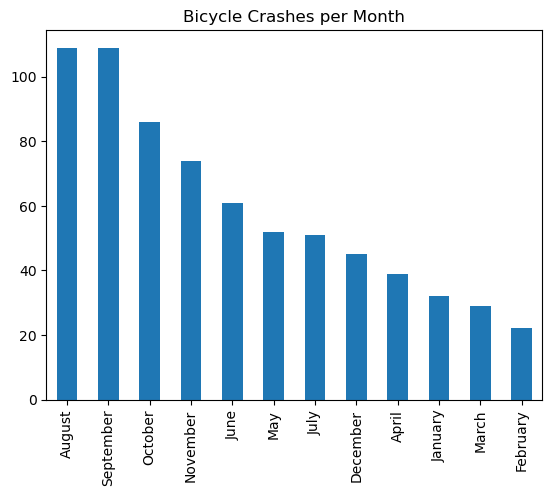

In [52]:
# visualization
bicycles["ReportedMonthName"].value_counts().plot(kind='bar', title='Bicycle Crashes per Month');

In [53]:
bicycles["NumKilled"].value_counts()

0    705
1      4
Name: NumKilled, dtype: int64

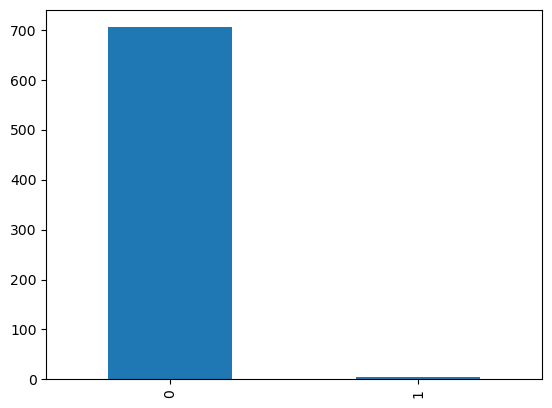

In [54]:
bicycles["NumKilled"].value_counts().plot(kind="bar");

## Crashes by year

In [55]:
bicycles["ReportedYear"].value_counts()

2018.0    153
2019.0    145
2017.0    106
2023.0     97
2020.0     73
2021.0     71
2022.0     64
Name: ReportedYear, dtype: int64

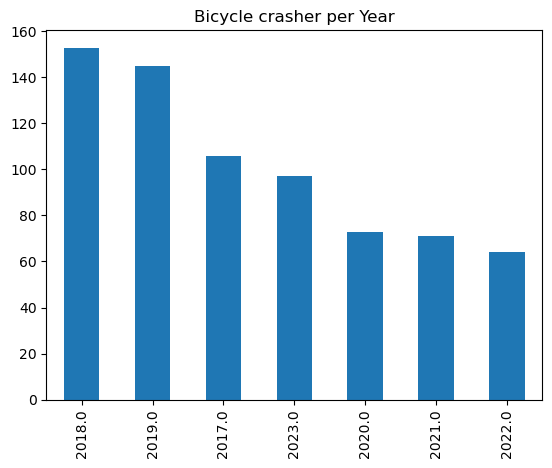

In [56]:
bicycles["ReportedYear"].value_counts().plot(kind='bar', title="Bicycle crasher per Year");
#order=bicycles["ReportedYear"].sort_values()

## Crashes by time of day

In [57]:
bicycles["ReportedHour"].value_counts()

10.0    72
15.0    63
13.0    59
14.0    55
12.0    53
9.0     52
16.0    49
17.0    48
11.0    44
18.0    41
23.0    26
22.0    25
20.0    22
19.0    19
7.0     16
21.0    16
8.0     12
0.0     11
1.0      8
6.0      7
4.0      3
5.0      3
3.0      3
2.0      2
Name: ReportedHour, dtype: int64

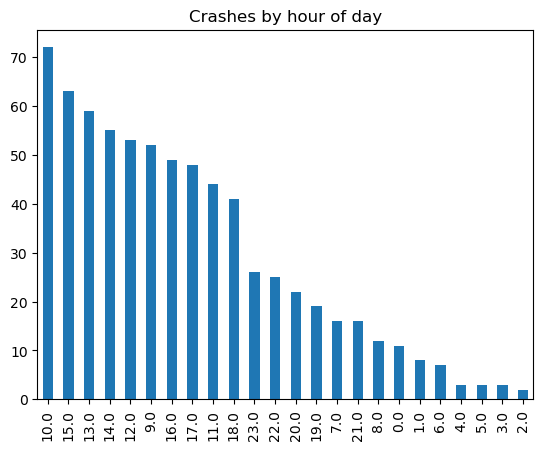

In [69]:
bicycles["ReportedHour"].value_counts().plot(kind="bar", title="Crashes by hour of day");

There appear to be the least crasher early in the mornings, and the most around 10a and early afternoon.

## Crashes by road condition

In [59]:
bicycles["RoadCondition"].value_counts()

DRY             657
WET              34
SNOWY/SLUSHY      7
ICY               3
Name: RoadCondition, dtype: int64

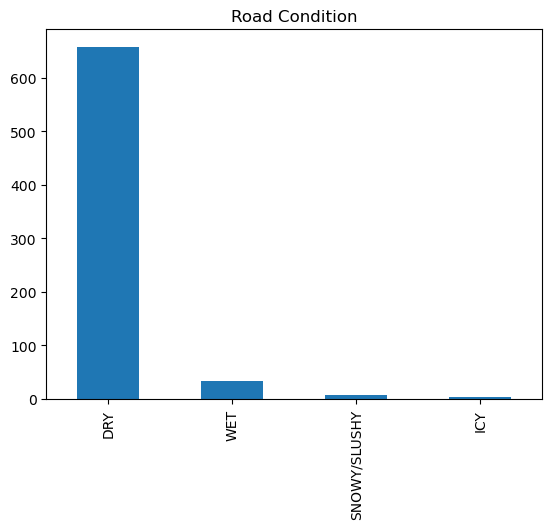

In [60]:
bicycles["RoadCondition"].value_counts().plot(kind="bar", title="Road Condition");

## Crashes by weather condition

In [61]:
bicycles["WeatherCondition"].value_counts()

NONE               659
RAIN                24
SNOW/SLEET/HAIL      9
CLOUDY               9
WIND                 5
BLOWING SNOW         1
Name: WeatherCondition, dtype: int64

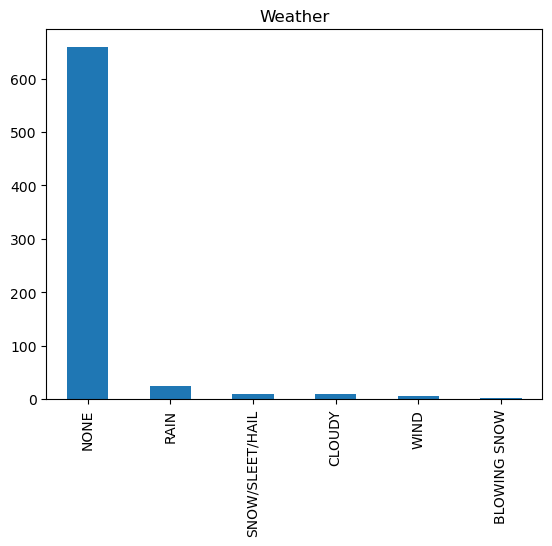

In [62]:
bicycles["WeatherCondition"].value_counts().plot(kind="bar", title="Weather");

## Crashes by day of week

In [63]:
days_dict = {1.0: "Saturday", 2.0: "Sunday", 3.0: "Monday", 4.0: "Tuesday",
            5.0: "Wednesday", 6.0: "Thursday", 7.0: "Friday"}

In [64]:
bicycles["ReportedDayofWeekNum"].map(days_dict).value_counts()

Tuesday      150
Wednesday    130
Thursday     110
Monday       108
Sunday        91
Friday        68
Saturday      52
Name: ReportedDayofWeekNum, dtype: int64

In [65]:
bicycles["ReportedDayofWeekNum"].value_counts()

4.0    150
5.0    130
6.0    110
3.0    108
2.0     91
7.0     68
1.0     52
Name: ReportedDayofWeekNum, dtype: int64

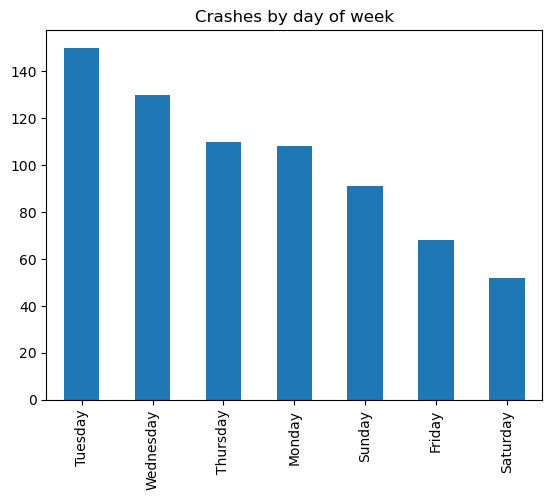

In [70]:
bicycles["ReportedDayofWeekNum"].map(days_dict).value_counts().plot(kind="bar", title="Crashes by day of week");

Days falling in the middle of the week seem to have more crashes. 

### Map of crash locations

In [67]:
# get lat and lon
lat_lon = bicycles[["Lat", "Lon"]]
lat_lon.dropna(inplace=True)
lat_lon

,Lat,Lon
5,40.004893,-105.258579
36,40.009451,-105.278667
56,40.021976,-105.238467
355,40.017687,-105.250702
522,40.055976,-105.282194
...,...,...
13071,40.029246,-105.290297
13072,39.999949,-105.254450
13073,40.025520,-105.288730
13074,40.022453,-105.280127


In [68]:


import folium
#create map
m = folium.Map(
    location=[40.00054,-105.1614],
    width='75%',
    length='75%',
    zoom_start=9.5
)

# add markers for each location
for a in list(range(len(lat_lon))):
    
    folium.Circle(
    radius=10,
    location=[lat_lon[['Lat','Lon']].iloc[a][0],lat_lon[['Lat','Lon']].iloc[a][1]],
    color="crimson",
    fill=True,
    ).add_to(m);

m